# Overfitting y Underfitting: Guía Completa con Regularización

## 📚 Conceptos, Implementación Práctica y Aplicaciones Reales

**Autor:** Manus AI  
**Fecha:** Junio 2025  
**Objetivo:** Comprender a fondo los conceptos de overfitting y underfitting, implementar técnicas de regularización y aplicarlas a casos reales.

---

### 🎯 Objetivos de Aprendizaje

Al finalizar este notebook, serás capaz de:

1. **Identificar** overfitting y underfitting en modelos de machine learning
2. **Comprender** el bias-variance tradeoff y su impacto en el rendimiento
3. **Implementar** técnicas de regularización L1 y L2 (Lasso y Ridge)
4. **Visualizar** curvas de aprendizaje para diagnosticar problemas de ajuste
5. **Aplicar** regularización en casos reales de diferentes dominios
6. **Seleccionar** los hiperparámetros óptimos usando validación cruzada

---

### 📋 Contenido del Notebook

1. [Introducción y Configuración](#1-introducción-y-configuración)
2. [Conceptos Fundamentales](#2-conceptos-fundamentales)
3. [Generación de Datos Sintéticos](#3-generación-de-datos-sintéticos)
4. [Demostración de Overfitting y Underfitting](#4-demostración-de-overfitting-y-underfitting)
5. [Bias-Variance Tradeoff](#5-bias-variance-tradeoff)
6. [Curvas de Aprendizaje](#6-curvas-de-aprendizaje)
7. [Regularización L1 y L2](#7-regularización-l1-y-l2)
8. [Selección de Hiperparámetros](#8-selección-de-hiperparámetros)
9. [Casos Reales de Aplicación](#9-casos-reales-de-aplicación)
10. [Mejores Prácticas y Conclusiones](#10-mejores-prácticas-y-conclusiones)

---

## 1. Introducción y Configuración

### 🔧 Instalación de Librerías

Comenzamos instalando e importando todas las librerías necesarias para nuestro análisis.

In [12]:
# Instalación de librerías adicionales si es necesario
!pip install scikit-learn matplotlib seaborn numpy pandas plotly -q

# Importación de librerías principales
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Configuración de visualización
plt.style.use('seaborn-v0_8')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# Para reproducibilidad
np.random.seed(42)

print("✅ Configuración completada exitosamente")
print(f"📊 Versión de NumPy: {np.__version__}")
print(f"🐼 Versión de Pandas: {pd.__version__}")

✅ Configuración completada exitosamente
📊 Versión de NumPy: 2.0.2
🐼 Versión de Pandas: 2.2.2


In [13]:
# Importación de librerías de Machine Learning
from sklearn.model_selection import (
    train_test_split, validation_curve, learning_curve,
    cross_val_score, GridSearchCV, KFold
)
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.datasets import make_regression, load_diabetes

print("🤖 Librerías de Machine Learning importadas correctamente")

🤖 Librerías de Machine Learning importadas correctamente


## 2. Conceptos Fundamentales

### 🧠 ¿Qué es el Overfitting y Underfitting?

Antes de implementar código, es crucial entender los conceptos teóricos:

#### 🔴 **Overfitting (Sobreajuste)**
- **Definición:** Ocurre cuando un modelo aprende demasiado de los datos de entrenamiento, incluyendo el ruido y las fluctuaciones aleatorias.
- **Síntomas:** Alto rendimiento en entrenamiento, bajo rendimiento en validación/prueba.
- **Analogía:** Como un estudiante que memoriza las respuestas exactas de un examen de práctica pero no entiende los conceptos subyacentes.

#### 🟡 **Underfitting (Subajuste)**
- **Definición:** Ocurre cuando un modelo es demasiado simple para capturar los patrones subyacentes en los datos.
- **Síntomas:** Bajo rendimiento tanto en entrenamiento como en validación/prueba.
- **Analogía:** Como un estudiante que no estudia lo suficiente y no puede responder correctamente ni las preguntas básicas.

#### 🟢 **Ajuste Apropiado**
- **Definición:** El modelo captura los patrones importantes sin memorizar el ruido.
- **Síntomas:** Buen rendimiento tanto en entrenamiento como en validación/prueba.
- **Analogía:** Como un estudiante que entiende los conceptos y puede aplicarlos a problemas nuevos.

### 📊 Bias-Variance Tradeoff

#### **Bias (Sesgo)**
- Error debido a suposiciones simplificadoras en el algoritmo de aprendizaje
- Alto bias → Underfitting
- Modelos con alto bias tienden a ser demasiado simples

#### **Variance (Varianza)**
- Error debido a la sensibilidad a pequeñas fluctuaciones en el conjunto de entrenamiento
- Alta variance → Overfitting
- Modelos con alta variance tienden a ser demasiado complejos

#### **Error Total**
```
Error Total = Bias² + Variance + Ruido Irreducible
```

## 3. Generación de Datos Sintéticos

### 🎲 Creación de Datasets para Experimentación

Vamos a crear diferentes tipos de datos sintéticos para demostrar los conceptos:

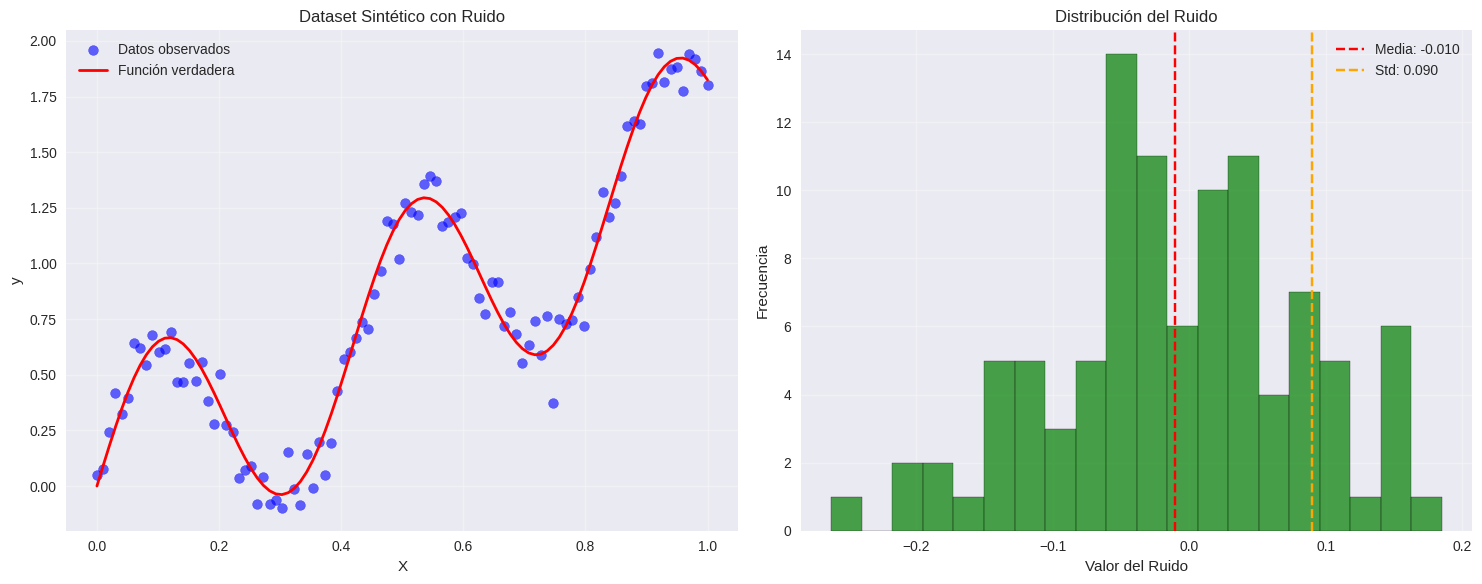

📊 Dataset generado:
   • Número de muestras: 100
   • Rango de X: [0.00, 1.00]
   • Rango de y: [-0.10, 1.95]
   • Desviación estándar del ruido: 0.090


In [14]:
def crear_datos_sinteticos(n_samples=100, noise_level=0.1, seed=42):
    """
    Crea un dataset sintético con una función no lineal subyacente.

    Parámetros:
    -----------
    n_samples : int
        Número de muestras a generar
    noise_level : float
        Nivel de ruido a agregar (desviación estándar)
    seed : int
        Semilla para reproducibilidad

    Retorna:
    --------
    X : array
        Variables independientes
    y : array
        Variable dependiente con ruido
    y_true : array
        Variable dependiente sin ruido (función verdadera)
    """
    np.random.seed(seed)

    # Generar X uniformemente distribuido
    X = np.linspace(0, 1, n_samples).reshape(-1, 1)

    # Función verdadera: combinación de lineal y sinusoidal
    y_true = 1.5 * X.ravel() + 0.5 * np.sin(15 * X.ravel())

    # Agregar ruido gaussiano
    noise = np.random.normal(0, noise_level, n_samples)
    y = y_true + noise

    return X, y, y_true

# Generar datos para nuestros experimentos
X, y, y_true = crear_datos_sinteticos(n_samples=100, noise_level=0.1)

# Visualizar los datos generados
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

# Datos con ruido
ax1.scatter(X, y, alpha=0.6, color='blue', s=50, label='Datos observados')
ax1.plot(X, y_true, color='red', linewidth=2, label='Función verdadera')
ax1.set_xlabel('X')
ax1.set_ylabel('y')
ax1.set_title('Dataset Sintético con Ruido')
ax1.legend()
ax1.grid(True, alpha=0.3)

# Distribución del ruido
noise_actual = y - y_true
ax2.hist(noise_actual, bins=20, alpha=0.7, color='green', edgecolor='black')
ax2.axvline(np.mean(noise_actual), color='red', linestyle='--',
           label=f'Media: {np.mean(noise_actual):.3f}')
ax2.axvline(np.std(noise_actual), color='orange', linestyle='--',
           label=f'Std: {np.std(noise_actual):.3f}')
ax2.set_xlabel('Valor del Ruido')
ax2.set_ylabel('Frecuencia')
ax2.set_title('Distribución del Ruido')
ax2.legend()
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"📊 Dataset generado:")
print(f"   • Número de muestras: {len(X)}")
print(f"   • Rango de X: [{X.min():.2f}, {X.max():.2f}]")
print(f"   • Rango de y: [{y.min():.2f}, {y.max():.2f}]")
print(f"   • Desviación estándar del ruido: {np.std(noise_actual):.3f}")

## 4. Demostración de Overfitting y Underfitting

### 🎭 Modelos con Diferentes Niveles de Complejidad

Vamos a entrenar modelos polinomiales con diferentes grados para demostrar underfitting, ajuste apropiado y overfitting:

In [15]:
def entrenar_modelo_polinomial(X_train, y_train, degree):
    """
    Entrena un modelo de regresión polinomial con el grado especificado.

    Parámetros:
    -----------
    X_train : array
        Datos de entrenamiento (características)
    y_train : array
        Datos de entrenamiento (objetivo)
    degree : int
        Grado del polinomio

    Retorna:
    --------
    pipeline : Pipeline
        Modelo entrenado
    """
    pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
        ('linear', LinearRegression())
    ])

    pipeline.fit(X_train, y_train)
    return pipeline

def evaluar_modelo(model, X_train, y_train, X_test, y_test):
    """
    Evalúa el rendimiento del modelo en conjuntos de entrenamiento y prueba.

    Parámetros:
    -----------
    model : Pipeline
        Modelo entrenado
    X_train, y_train : arrays
        Datos de entrenamiento
    X_test, y_test : arrays
        Datos de prueba

    Retorna:
    --------
    dict : Métricas de rendimiento
    """
    # Predicciones
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Métricas
    metrics = {
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred),
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred),
        'train_mae': mean_absolute_error(y_train, y_train_pred),
        'test_mae': mean_absolute_error(y_test, y_test_pred)
    }

    return metrics

# Dividir datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Definir grados de polinomios a probar
degrees = [1, 3, 10, 15]
models = {}
metrics_results = {}

# Entrenar modelos con diferentes grados
for degree in degrees:
    print(f"🔄 Entrenando modelo polinomial de grado {degree}...")

    # Entrenar modelo
    model = entrenar_modelo_polinomial(X_train, y_train, degree)
    models[degree] = model

    # Evaluar modelo
    metrics = evaluar_modelo(model, X_train, y_train, X_test, y_test)
    metrics_results[degree] = metrics

    print(f"   📈 MSE Entrenamiento: {metrics['train_mse']:.4f}")
    print(f"   📉 MSE Prueba: {metrics['test_mse']:.4f}")
    print(f"   🎯 R² Entrenamiento: {metrics['train_r2']:.4f}")
    print(f"   🎯 R² Prueba: {metrics['test_r2']:.4f}")
    print()

print("✅ Entrenamiento de modelos completado")

🔄 Entrenando modelo polinomial de grado 1...
   📈 MSE Entrenamiento: 0.1235
   📉 MSE Prueba: 0.1544
   🎯 R² Entrenamiento: 0.6337
   🎯 R² Prueba: 0.4272

🔄 Entrenando modelo polinomial de grado 3...
   📈 MSE Entrenamiento: 0.1041
   📉 MSE Prueba: 0.1290
   🎯 R² Entrenamiento: 0.6913
   🎯 R² Prueba: 0.5214

🔄 Entrenando modelo polinomial de grado 10...
   📈 MSE Entrenamiento: 0.0078
   📉 MSE Prueba: 0.0085
   🎯 R² Entrenamiento: 0.9770
   🎯 R² Prueba: 0.9684

🔄 Entrenando modelo polinomial de grado 15...
   📈 MSE Entrenamiento: 0.0072
   📉 MSE Prueba: 0.0088
   🎯 R² Entrenamiento: 0.9786
   🎯 R² Prueba: 0.9672

✅ Entrenamiento de modelos completado


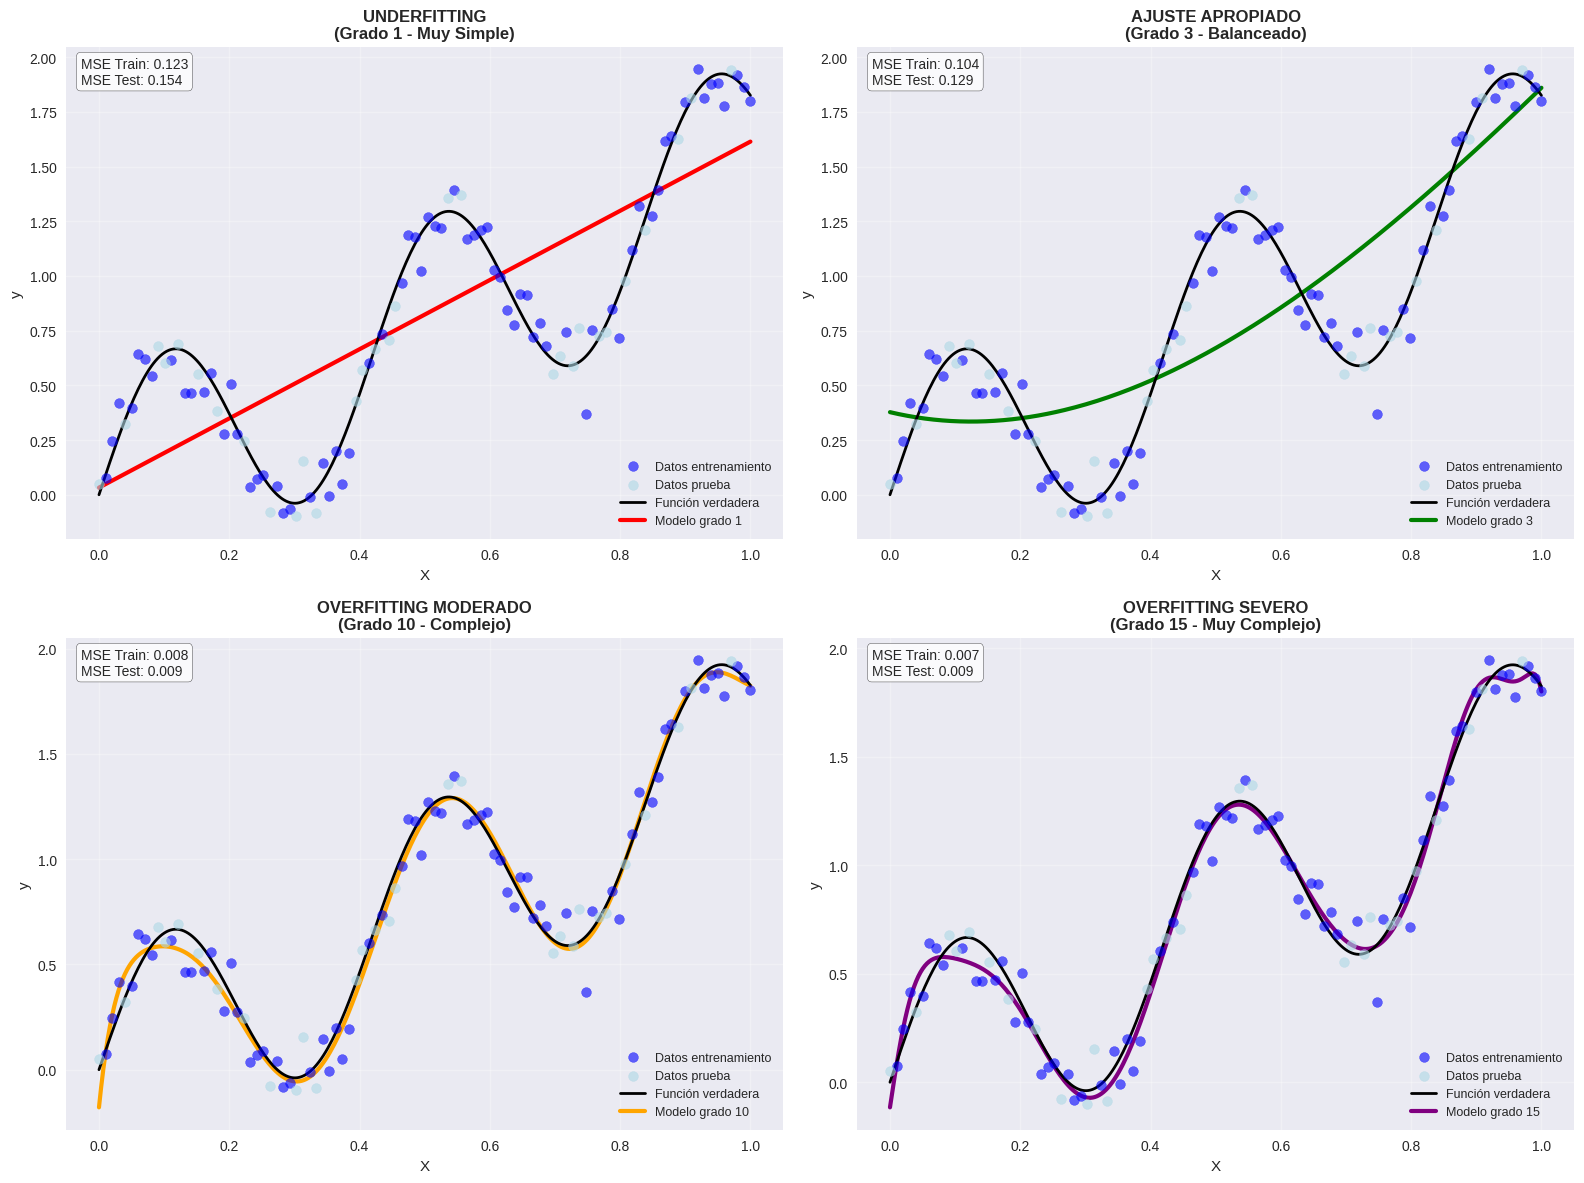


📊 RESUMEN DE MÉTRICAS POR GRADO DE POLINOMIO
       train_mse  test_mse  train_r2  test_r2  train_mae  test_mae                            Interpretación
Grado                                                                                                       
1         0.1235    0.1544    0.6337   0.4272     0.3087    0.3422          UNDERFITTING - Modelo muy simple
3         0.1041    0.1290    0.6913   0.5214     0.2713    0.3092                  APROPIADO - Buen balance
10        0.0078    0.0085    0.9770   0.9684     0.0715    0.0735             OVERFITTING - Modelo complejo
15        0.0072    0.0088    0.9786   0.9672     0.0679    0.0773  OVERFITTING SEVERO - Modelo muy complejo

🔍 ANÁLISIS DE LA BRECHA ENTRENAMIENTO-PRUEBA
Grado  1: Brecha MSE = +0.0309, Brecha R² = +0.2065
         ✅ Ajuste apropiado
Grado  3: Brecha MSE = +0.0249, Brecha R² = +0.1699
         ✅ Ajuste apropiado
Grado 10: Brecha MSE = +0.0008, Brecha R² = +0.0086
         ✅ Ajuste apropiado
Grado 15: Brec

In [16]:
# Visualizar las predicciones de los diferentes modelos
X_plot = np.linspace(0, 1, 300).reshape(-1, 1)

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

titles = {
    1: 'UNDERFITTING\n(Grado 1 - Muy Simple)',
    3: 'AJUSTE APROPIADO\n(Grado 3 - Balanceado)',
    10: 'OVERFITTING MODERADO\n(Grado 10 - Complejo)',
    15: 'OVERFITTING SEVERO\n(Grado 15 - Muy Complejo)'
}

colors = {1: 'red', 3: 'green', 10: 'orange', 15: 'purple'}

for i, degree in enumerate(degrees):
    ax = axes[i]

    # Datos de entrenamiento
    ax.scatter(X_train, y_train, alpha=0.6, color='blue', s=50,
              label='Datos entrenamiento', zorder=3)

    # Datos de prueba
    ax.scatter(X_test, y_test, alpha=0.6, color='lightblue', s=50,
              label='Datos prueba', zorder=3)

    # Función verdadera
    y_true_plot = 1.5 * X_plot.ravel() + 0.5 * np.sin(15 * X_plot.ravel())
    ax.plot(X_plot, y_true_plot, color='black', linewidth=2,
           label='Función verdadera', zorder=2)

    # Predicción del modelo
    y_pred_plot = models[degree].predict(X_plot)
    ax.plot(X_plot, y_pred_plot, color=colors[degree], linewidth=3,
           label=f'Modelo grado {degree}', zorder=1)

    # Configuración del subplot
    ax.set_title(titles[degree], fontweight='bold', fontsize=12)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

    # Agregar métricas como texto
    metrics = metrics_results[degree]
    text = f"MSE Train: {metrics['train_mse']:.3f}\nMSE Test: {metrics['test_mse']:.3f}"
    ax.text(0.02, 0.98, text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Crear tabla resumen de métricas
print("\n📊 RESUMEN DE MÉTRICAS POR GRADO DE POLINOMIO")
print("=" * 80)

df_metrics = pd.DataFrame(metrics_results).T
df_metrics.index.name = 'Grado'
df_metrics = df_metrics.round(4)

# Agregar interpretación
interpretations = {
    1: 'UNDERFITTING - Modelo muy simple',
    3: 'APROPIADO - Buen balance',
    10: 'OVERFITTING - Modelo complejo',
    15: 'OVERFITTING SEVERO - Modelo muy complejo'
}

df_metrics['Interpretación'] = [interpretations[i] for i in df_metrics.index]

print(df_metrics.to_string())

# Análisis de la brecha entre entrenamiento y prueba
print("\n🔍 ANÁLISIS DE LA BRECHA ENTRENAMIENTO-PRUEBA")
print("=" * 60)

for degree in degrees:
    metrics = metrics_results[degree]
    gap_mse = metrics['test_mse'] - metrics['train_mse']
    gap_r2 = metrics['train_r2'] - metrics['test_r2']

    print(f"Grado {degree:2d}: Brecha MSE = {gap_mse:+.4f}, Brecha R² = {gap_r2:+.4f}")

    if gap_mse > 0.05:
        print(f"         ⚠️  OVERFITTING detectado (brecha MSE alta)")
    elif gap_mse < 0.01 and metrics['test_mse'] > 0.1:
        print(f"         ⚠️  UNDERFITTING detectado (MSE alto en ambos)")
    else:
        print(f"         ✅ Ajuste apropiado")

## 5. Bias-Variance Tradeoff

### ⚖️ Análisis Experimental del Tradeoff

Vamos a realizar un experimento para demostrar empíricamente el bias-variance tradeoff:

In [17]:
def bias_variance_experiment(degrees, n_experiments=100, n_samples=50):
    """
    Realiza un experimento para medir bias y variance empíricamente.

    Parámetros:
    -----------
    degrees : list
        Lista de grados de polinomios a evaluar
    n_experiments : int
        Número de experimentos (datasets diferentes)
    n_samples : int
        Número de muestras por dataset

    Retorna:
    --------
    dict : Resultados del experimento
    """
    # Puntos de evaluación fijos
    X_eval = np.linspace(0, 1, 20).reshape(-1, 1)
    y_true_eval = 1.5 * X_eval.ravel() + 0.5 * np.sin(15 * X_eval.ravel())

    results = {}

    for degree in degrees:
        print(f"🔄 Analizando grado {degree}...")

        predictions = []

        # Realizar múltiples experimentos
        for exp in range(n_experiments):
            # Generar nuevo dataset
            X_exp, y_exp, _ = crear_datos_sinteticos(
                n_samples=n_samples,
                noise_level=0.1,
                seed=exp
            )

            # Entrenar modelo
            model = entrenar_modelo_polinomial(X_exp, y_exp, degree)

            # Predecir en puntos de evaluación
            y_pred = model.predict(X_eval)
            predictions.append(y_pred)

        # Convertir a array para cálculos
        predictions = np.array(predictions)  # Shape: (n_experiments, n_eval_points)

        # Calcular bias y variance
        mean_prediction = np.mean(predictions, axis=0)
        bias_squared = np.mean((mean_prediction - y_true_eval) ** 2)
        variance = np.mean(np.var(predictions, axis=0))

        # Ruido irreducible (estimado)
        noise = 0.1 ** 2  # Varianza del ruido que agregamos

        # Error total esperado
        total_error = bias_squared + variance + noise

        results[degree] = {
            'bias_squared': bias_squared,
            'variance': variance,
            'noise': noise,
            'total_error': total_error,
            'predictions': predictions,
            'mean_prediction': mean_prediction
        }

    return results, X_eval, y_true_eval

# Realizar experimento
print("🧪 Iniciando experimento de Bias-Variance...")
bias_var_results, X_eval, y_true_eval = bias_variance_experiment(
    degrees=[1, 3, 6, 10, 15],
    n_experiments=100,
    n_samples=50
)

print("✅ Experimento completado")

🧪 Iniciando experimento de Bias-Variance...
🔄 Analizando grado 1...
🔄 Analizando grado 3...
🔄 Analizando grado 6...
🔄 Analizando grado 10...
🔄 Analizando grado 15...
✅ Experimento completado


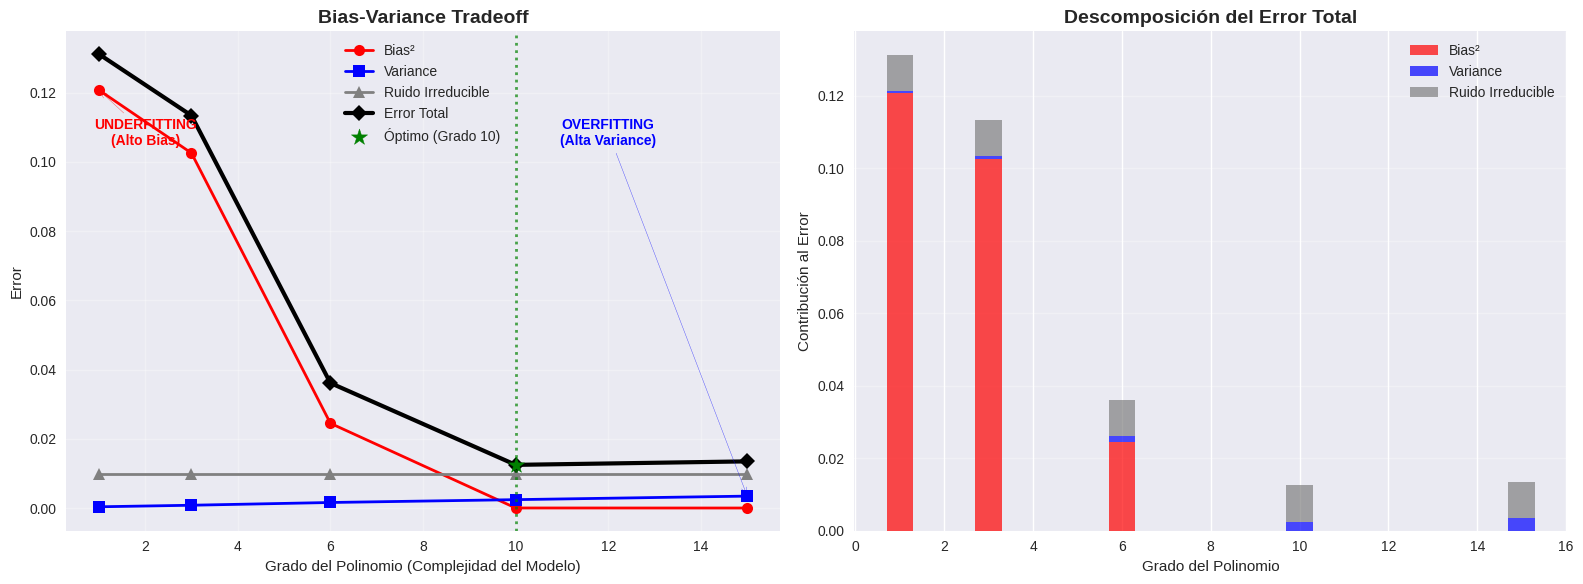


📊 DESCOMPOSICIÓN BIAS-VARIANCE POR GRADO
 Grado  Bias²  Variance  Ruido  Error Total
     1 0.1208    0.0004   0.01       0.1312
     3 0.1026    0.0008   0.01       0.1134
     6 0.0245    0.0016   0.01       0.0361
    10 0.0000    0.0025   0.01       0.0125
    15 0.0000    0.0035   0.01       0.0135

🎯 GRADO ÓPTIMO: 10
   Error Total Mínimo: 0.0125
   Bias² en óptimo: 0.0000
   Variance en óptimo: 0.0025


In [18]:
# Visualizar resultados del experimento Bias-Variance
degrees_bv = list(bias_var_results.keys())

# Extraer métricas
bias_values = [bias_var_results[d]['bias_squared'] for d in degrees_bv]
variance_values = [bias_var_results[d]['variance'] for d in degrees_bv]
noise_values = [bias_var_results[d]['noise'] for d in degrees_bv]
total_error_values = [bias_var_results[d]['total_error'] for d in degrees_bv]

# Crear gráfica del tradeoff
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))

# Gráfica principal del tradeoff
ax1.plot(degrees_bv, bias_values, 'o-', linewidth=2, markersize=8,
         label='Bias²', color='red')
ax1.plot(degrees_bv, variance_values, 's-', linewidth=2, markersize=8,
         label='Variance', color='blue')
ax1.plot(degrees_bv, noise_values, '^-', linewidth=2, markersize=8,
         label='Ruido Irreducible', color='gray')
ax1.plot(degrees_bv, total_error_values, 'D-', linewidth=3, markersize=8,
         label='Error Total', color='black')

# Marcar el punto óptimo
optimal_idx = np.argmin(total_error_values)
optimal_degree = degrees_bv[optimal_idx]
ax1.axvline(x=optimal_degree, color='green', linestyle=':', alpha=0.7, linewidth=2)
ax1.scatter(optimal_degree, total_error_values[optimal_idx],
           color='green', s=150, zorder=5, marker='*',
           label=f'Óptimo (Grado {optimal_degree})')

ax1.set_xlabel('Grado del Polinomio (Complejidad del Modelo)')
ax1.set_ylabel('Error')
ax1.set_title('Bias-Variance Tradeoff', fontweight='bold', fontsize=14)
ax1.legend()
ax1.grid(True, alpha=0.3)

# Agregar anotaciones
ax1.annotate('UNDERFITTING\n(Alto Bias)',
            xy=(1, bias_values[0]), xytext=(2, max(total_error_values) * 0.8),
            arrowprops=dict(arrowstyle='->', color='red', alpha=0.7),
            fontsize=10, ha='center', color='red', fontweight='bold')

ax1.annotate('OVERFITTING\n(Alta Variance)',
            xy=(15, variance_values[-1]), xytext=(12, max(total_error_values) * 0.8),
            arrowprops=dict(arrowstyle='->', color='blue', alpha=0.7),
            fontsize=10, ha='center', color='blue', fontweight='bold')

# Gráfica de barras apiladas
width = 0.6
ax2.bar(degrees_bv, bias_values, width, label='Bias²', color='red', alpha=0.7)
ax2.bar(degrees_bv, variance_values, width, bottom=bias_values,
        label='Variance', color='blue', alpha=0.7)
ax2.bar(degrees_bv, noise_values, width,
        bottom=np.array(bias_values) + np.array(variance_values),
        label='Ruido Irreducible', color='gray', alpha=0.7)

ax2.set_xlabel('Grado del Polinomio')
ax2.set_ylabel('Contribución al Error')
ax2.set_title('Descomposición del Error Total', fontweight='bold', fontsize=14)
ax2.legend()
ax2.grid(True, alpha=0.3, axis='y')

plt.tight_layout()
plt.show()

# Tabla resumen
print("\n📊 DESCOMPOSICIÓN BIAS-VARIANCE POR GRADO")
print("=" * 70)

df_bv = pd.DataFrame({
    'Grado': degrees_bv,
    'Bias²': bias_values,
    'Variance': variance_values,
    'Ruido': noise_values,
    'Error Total': total_error_values
})

df_bv = df_bv.round(4)
print(df_bv.to_string(index=False))

print(f"\n🎯 GRADO ÓPTIMO: {optimal_degree}")
print(f"   Error Total Mínimo: {min(total_error_values):.4f}")
print(f"   Bias² en óptimo: {bias_var_results[optimal_degree]['bias_squared']:.4f}")
print(f"   Variance en óptimo: {bias_var_results[optimal_degree]['variance']:.4f}")

## 6. Curvas de Aprendizaje

### 📈 Diagnóstico mediante Curvas de Aprendizaje

Las curvas de aprendizaje nos ayudan a diagnosticar si nuestro modelo sufre de overfitting o underfitting:

📈 Generando curvas de aprendizaje...


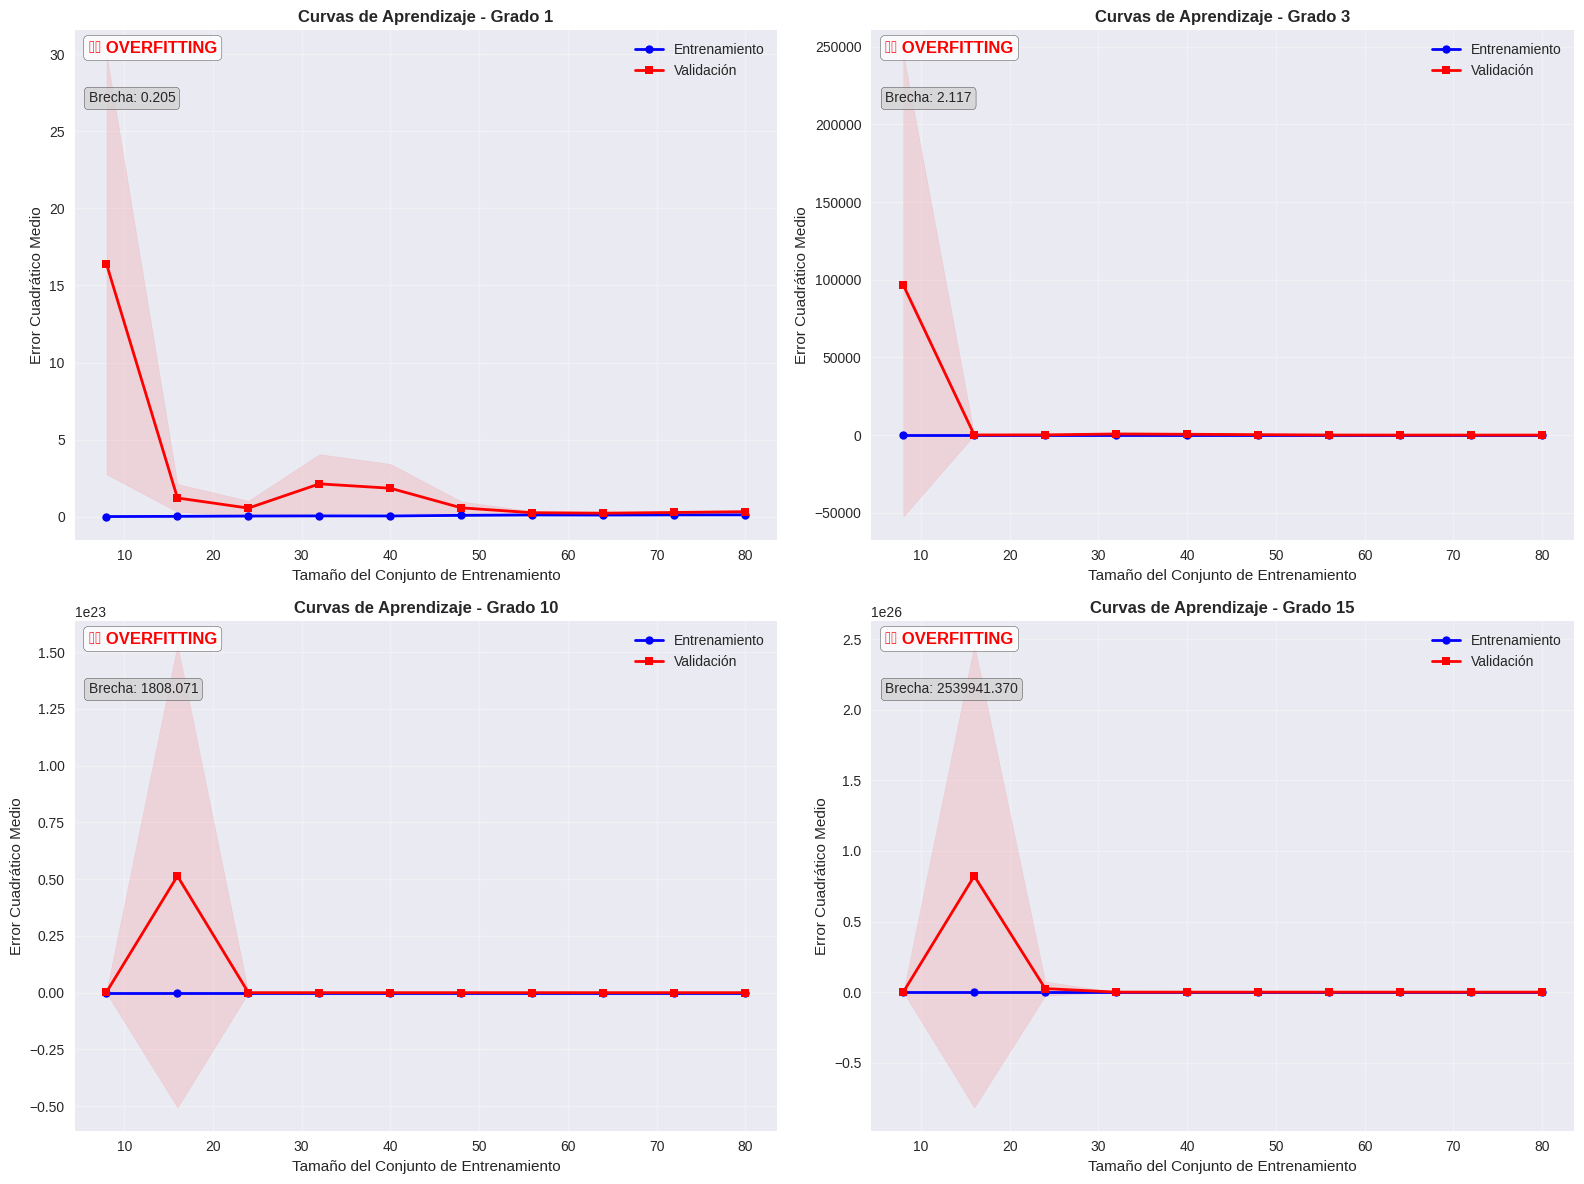

✅ Curvas de aprendizaje generadas


In [19]:
def plot_learning_curves(X, y, models_dict, cv=5):
    """
    Genera curvas de aprendizaje para diferentes modelos.

    Parámetros:
    -----------
    X, y : arrays
        Datos de entrada
    models_dict : dict
        Diccionario con modelos a evaluar
    cv : int
        Número de folds para validación cruzada
    """
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    axes = axes.ravel()

    colors = {'train': 'blue', 'validation': 'red'}

    for i, (degree, model) in enumerate(models_dict.items()):
        if i >= 4:  # Solo mostrar 4 modelos
            break

        ax = axes[i]

        # Calcular curvas de aprendizaje
        train_sizes, train_scores, val_scores = learning_curve(
            model, X, y,
            train_sizes=np.linspace(0.1, 1.0, 10),
            cv=cv,
            scoring='neg_mean_squared_error',
            random_state=42,
            n_jobs=-1
        )

        # Convertir a MSE positivo
        train_scores = -train_scores
        val_scores = -val_scores

        # Calcular estadísticas
        train_mean = np.mean(train_scores, axis=1)
        train_std = np.std(train_scores, axis=1)
        val_mean = np.mean(val_scores, axis=1)
        val_std = np.std(val_scores, axis=1)

        # Plotear curvas
        ax.plot(train_sizes, train_mean, 'o-', color=colors['train'],
               linewidth=2, markersize=6, label='Entrenamiento')
        ax.fill_between(train_sizes, train_mean - train_std, train_mean + train_std,
                       alpha=0.1, color=colors['train'])

        ax.plot(train_sizes, val_mean, 's-', color=colors['validation'],
               linewidth=2, markersize=6, label='Validación')
        ax.fill_between(train_sizes, val_mean - val_std, val_mean + val_std,
                       alpha=0.1, color=colors['validation'])

        # Configuración
        ax.set_xlabel('Tamaño del Conjunto de Entrenamiento')
        ax.set_ylabel('Error Cuadrático Medio')
        ax.set_title(f'Curvas de Aprendizaje - Grado {degree}', fontweight='bold')
        ax.legend()
        ax.grid(True, alpha=0.3)

        # Diagnóstico automático
        final_gap = val_mean[-1] - train_mean[-1]
        final_val_error = val_mean[-1]

        if final_gap > 0.05:  # Gran brecha
            diagnosis = "⚠️ OVERFITTING"
            color_diag = 'red'
        elif final_val_error > 0.1:  # Error alto en ambos
            diagnosis = "⚠️ UNDERFITTING"
            color_diag = 'orange'
        else:
            diagnosis = "✅ APROPIADO"
            color_diag = 'green'

        ax.text(0.02, 0.98, diagnosis, transform=ax.transAxes,
               fontsize=12, fontweight='bold', color=color_diag,
               verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

        # Mostrar brecha final
        gap_text = f"Brecha: {final_gap:.3f}"
        ax.text(0.02, 0.88, gap_text, transform=ax.transAxes,
               fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='lightgray', alpha=0.8))

    plt.tight_layout()
    plt.show()

# Generar curvas de aprendizaje para nuestros modelos
print("📈 Generando curvas de aprendizaje...")

# Seleccionar modelos representativos
selected_models = {1: models[1], 3: models[3], 10: models[10], 15: models[15]}

plot_learning_curves(X, y, selected_models, cv=5)

print("✅ Curvas de aprendizaje generadas")

### 🔍 Interpretación de las Curvas de Aprendizaje

**Patrones a identificar:**

1. **🔴 Overfitting:**
   - Gran brecha entre curvas de entrenamiento y validación
   - Curva de entrenamiento baja, curva de validación alta
   - La brecha no se cierra al aumentar datos

2. **🟡 Underfitting:**
   - Ambas curvas convergen a un valor alto
   - Poca brecha entre entrenamiento y validación
   - Rendimiento pobre en general

3. **🟢 Ajuste Apropiado:**
   - Curvas convergen a un valor bajo
   - Brecha pequeña entre entrenamiento y validación
   - Buen rendimiento general

4. **📊 Más Datos Necesarios:**
   - Curvas aún no han convergido
   - Tendencia descendente en curva de validación

## 7. Regularización L1 y L2

### 🛡️ Técnicas de Regularización

La regularización es una técnica fundamental para combatir el overfitting. Vamos a implementar y comparar las dos técnicas principales:

In [20]:
# Teoría de Regularización
print("🧮 FUNDAMENTOS MATEMÁTICOS DE LA REGULARIZACIÓN")
print("=" * 60)
print()
print("📐 FUNCIÓN DE PÉRDIDA GENERAL:")
print("   L(θ) = MSE(θ) + λ × R(θ)")
print("   Donde:")
print("   • MSE(θ) = Error cuadrático medio")
print("   • λ = Parámetro de regularización")
print("   • R(θ) = Término de regularización")
print()
print("🔸 REGULARIZACIÓN L1 (LASSO):")
print("   R(θ) = Σ|θᵢ|")
print("   • Penaliza la suma de valores absolutos")
print("   • Puede reducir coeficientes exactamente a cero")
print("   • Realiza selección automática de características")
print("   • Útil cuando hay muchas características irrelevantes")
print()
print("🔹 REGULARIZACIÓN L2 (RIDGE):")
print("   R(θ) = Σθᵢ²")
print("   • Penaliza la suma de cuadrados")
print("   • Reduce coeficientes hacia cero pero nunca a cero")
print("   • Distribuye el efecto entre características correlacionadas")
print("   • Útil cuando todas las características son relevantes")
print()
print("⚖️ PARÁMETRO λ (LAMBDA):")
print("   • λ = 0: Sin regularización (regresión ordinaria)")
print("   • λ pequeño: Poca regularización")
print("   • λ grande: Mucha regularización (riesgo de underfitting)")
print("   • Selección óptima: Validación cruzada")

🧮 FUNDAMENTOS MATEMÁTICOS DE LA REGULARIZACIÓN

📐 FUNCIÓN DE PÉRDIDA GENERAL:
   L(θ) = MSE(θ) + λ × R(θ)
   Donde:
   • MSE(θ) = Error cuadrático medio
   • λ = Parámetro de regularización
   • R(θ) = Término de regularización

🔸 REGULARIZACIÓN L1 (LASSO):
   R(θ) = Σ|θᵢ|
   • Penaliza la suma de valores absolutos
   • Puede reducir coeficientes exactamente a cero
   • Realiza selección automática de características
   • Útil cuando hay muchas características irrelevantes

🔹 REGULARIZACIÓN L2 (RIDGE):
   R(θ) = Σθᵢ²
   • Penaliza la suma de cuadrados
   • Reduce coeficientes hacia cero pero nunca a cero
   • Distribuye el efecto entre características correlacionadas
   • Útil cuando todas las características son relevantes

⚖️ PARÁMETRO λ (LAMBDA):
   • λ = 0: Sin regularización (regresión ordinaria)
   • λ pequeño: Poca regularización
   • λ grande: Mucha regularización (riesgo de underfitting)
   • Selección óptima: Validación cruzada


In [21]:
def entrenar_modelos_regularizados(X_train, y_train, degree=10):
    """
    Entrena modelos con diferentes tipos de regularización.

    Parámetros:
    -----------
    X_train, y_train : arrays
        Datos de entrenamiento
    degree : int
        Grado del polinomio

    Retorna:
    --------
    dict : Modelos entrenados
    """
    models_reg = {}

    # Valores de alpha (lambda) a probar
    alphas = [0.0, 0.01, 0.1, 1.0, 10.0]

    for alpha in alphas:
        # Modelo sin regularización
        if alpha == 0.0:
            model_none = Pipeline([
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('linear', LinearRegression())
            ])
            model_none.fit(X_train, y_train)
            models_reg[f'Sin_Reg'] = model_none

        # Ridge (L2)
        model_ridge = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('ridge', Ridge(alpha=alpha, random_state=42))
        ])
        model_ridge.fit(X_train, y_train)
        models_reg[f'Ridge_α{alpha}'] = model_ridge

        # Lasso (L1)
        model_lasso = Pipeline([
            ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
            ('lasso', Lasso(alpha=alpha, max_iter=2000, random_state=42))
        ])
        model_lasso.fit(X_train, y_train)
        models_reg[f'Lasso_α{alpha}'] = model_lasso

        # Elastic Net (combinación L1 + L2)
        if alpha > 0:
            model_elastic = Pipeline([
                ('poly', PolynomialFeatures(degree=degree, include_bias=False)),
                ('elastic', ElasticNet(alpha=alpha, l1_ratio=0.5, max_iter=2000, random_state=42))
            ])
            model_elastic.fit(X_train, y_train)
            models_reg[f'Elastic_α{alpha}'] = model_elastic

    return models_reg

# Entrenar modelos regularizados
print("🔄 Entrenando modelos con regularización...")
models_regularized = entrenar_modelos_regularizados(X_train, y_train, degree=10)

# Evaluar todos los modelos
results_reg = {}
for name, model in models_regularized.items():
    metrics = evaluar_modelo(model, X_train, y_train, X_test, y_test)
    results_reg[name] = metrics

print(f"✅ {len(models_regularized)} modelos entrenados")

# Crear DataFrame con resultados
df_reg = pd.DataFrame(results_reg).T
df_reg = df_reg.round(4)

print("\n📊 COMPARACIÓN DE MODELOS REGULARIZADOS")
print("=" * 80)
print(df_reg[['train_mse', 'test_mse', 'train_r2', 'test_r2']].to_string())

🔄 Entrenando modelos con regularización...
✅ 15 modelos entrenados

📊 COMPARACIÓN DE MODELOS REGULARIZADOS
               train_mse  test_mse  train_r2  test_r2
Sin_Reg           0.0078    0.0085    0.9770   0.9684
Ridge_α0.0        0.0078    0.0085    0.9770   0.9686
Lasso_α0.0        0.0879    0.1077    0.7392   0.6002
Ridge_α0.01       0.0974    0.1148    0.7110   0.5740
Lasso_α0.01       0.1051    0.1243    0.6884   0.5390
Elastic_α0.01     0.1048    0.1195    0.6892   0.5568
Ridge_α0.1        0.1027    0.1178    0.6953   0.5628
Lasso_α0.1        0.2110    0.1924    0.3742   0.2860
Elastic_α0.1      0.1493    0.1469    0.5572   0.4549
Ridge_α1.0        0.1051    0.1158    0.6882   0.5703
Lasso_α1.0        0.3371    0.2902    0.0000  -0.0767
Elastic_α1.0      0.3371    0.2902    0.0000  -0.0767
Ridge_α10.0       0.1183    0.1185    0.6491   0.5602
Lasso_α10.0       0.3371    0.2902    0.0000  -0.0767
Elastic_α10.0     0.3371    0.2902    0.0000  -0.0767


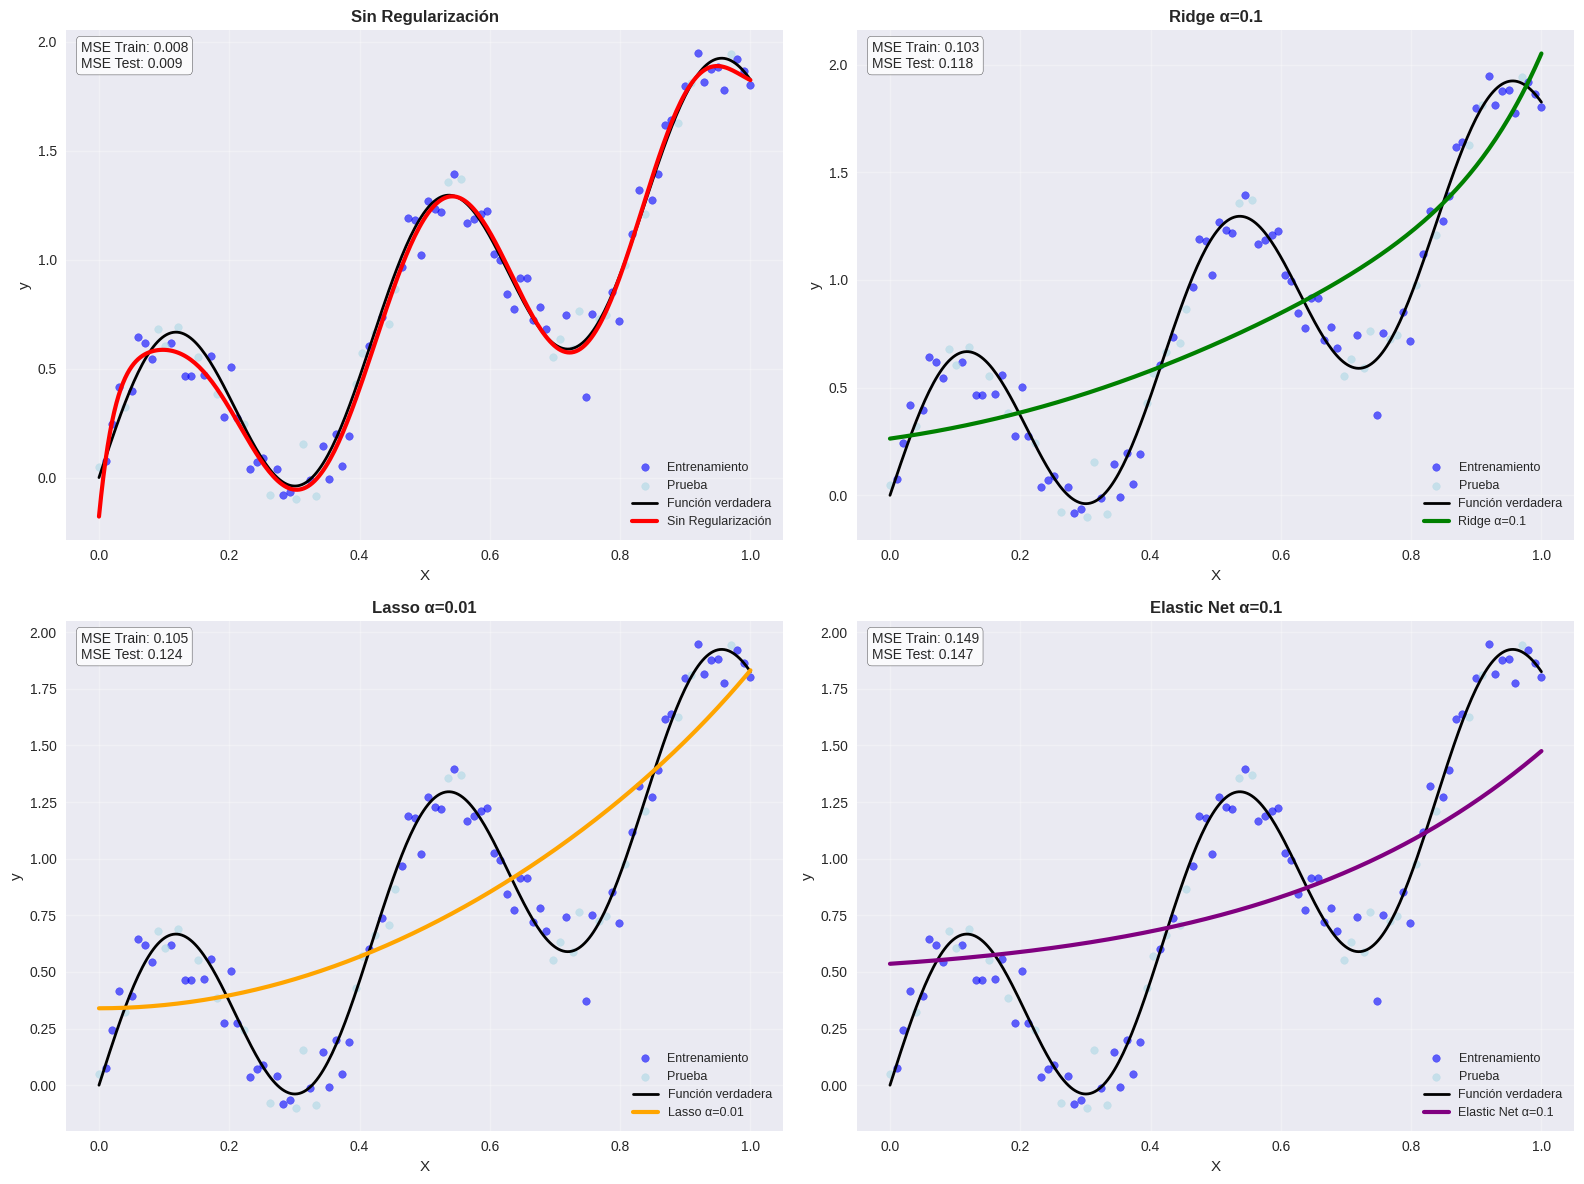


🔍 ANÁLISIS DE COEFICIENTES
                    n_nonzero     max_coef  mean_abs_coef     std_coef
Sin Regularización       10.0  393907.4127    133768.1493  194535.4794
Ridge α=0.1              10.0       0.8293         0.2613       0.2858
Lasso α=0.01              2.0       1.4237         0.1492       0.4253
Elastic Net α=0.1         6.0       0.2964         0.0939       0.1069

📝 INTERPRETACIÓN:
• n_nonzero: Número de coeficientes no cero (selección de características)
• max_coef: Magnitud máxima de coeficientes
• mean_abs_coef: Magnitud promedio de coeficientes
• std_coef: Variabilidad de coeficientes


In [23]:
# Visualizar efectos de la regularización
X_plot = np.linspace(0, 1, 300).reshape(-1, 1)
y_true_plot = 1.5 * X_plot.ravel() + 0.5 * np.sin(15 * X_plot.ravel())

# Seleccionar modelos representativos para visualización
selected_reg_models = {
    'Sin Regularización': models_regularized['Sin_Reg'],
    'Ridge α=0.1': models_regularized['Ridge_α0.1'],
    'Lasso α=0.01': models_regularized['Lasso_α0.01'],
    'Elastic Net α=0.1': models_regularized['Elastic_α0.1']
}

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.ravel()

colors = ['red', 'green', 'orange', 'purple']

for i, (name, model) in enumerate(selected_reg_models.items()):
    ax = axes[i]

    # Datos
    ax.scatter(X_train, y_train, alpha=0.6, color='blue', s=30, label='Entrenamiento')
    ax.scatter(X_test, y_test, alpha=0.6, color='lightblue', s=30, label='Prueba')

    # Función verdadera
    ax.plot(X_plot, y_true_plot, color='black', linewidth=2, label='Función verdadera')

    # Predicción del modelo
    y_pred_plot = model.predict(X_plot)
    ax.plot(X_plot, y_pred_plot, color=colors[i], linewidth=3, label=name)

    # Configuración
    ax.set_title(name, fontweight='bold', fontsize=12)
    ax.set_xlabel('X')
    ax.set_ylabel('y')
    ax.legend(fontsize=9)
    ax.grid(True, alpha=0.3)

    # Métricas
    model_key = list(models_regularized.keys())[list(models_regularized.values()).index(model)]
    metrics = results_reg[model_key]
    text = f"MSE Train: {metrics['train_mse']:.3f}\nMSE Test: {metrics['test_mse']:.3f}"
    ax.text(0.02, 0.98, text, transform=ax.transAxes, fontsize=10,
           verticalalignment='top', bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Análisis de coeficientes
print("\n🔍 ANÁLISIS DE COEFICIENTES")
print("=" * 50)

# Extraer coeficientes de modelos seleccionados
coef_analysis = {}
for name, model in selected_reg_models.items():
    # Access coefficients based on the model type in the pipeline
    if 'ridge' in model.named_steps:
        coefs = model.named_steps['ridge'].coef_
    elif 'lasso' in model.named_steps:
        coefs = model.named_steps['lasso'].coef_
    elif 'elastic' in model.named_steps:
        coefs = model.named_steps['elastic'].coef_
    else: # Assuming LinearRegression for 'Sin Regularización'
        coefs = model.named_steps['linear'].coef_


    coef_analysis[name] = {
        'n_nonzero': np.sum(np.abs(coefs) > 1e-6),
        'max_coef': np.max(np.abs(coefs)),
        'mean_abs_coef': np.mean(np.abs(coefs)),
        'std_coef': np.std(coefs)
    }

df_coef = pd.DataFrame(coef_analysis).T
df_coef = df_coef.round(4)
print(df_coef.to_string())

print("\n📝 INTERPRETACIÓN:")
print("• n_nonzero: Número de coeficientes no cero (selección de características)")
print("• max_coef: Magnitud máxima de coeficientes")
print("• mean_abs_coef: Magnitud promedio de coeficientes")
print("• std_coef: Variabilidad de coeficientes")

## 8. Selección de Hiperparámetros

### 🎯 Optimización del Parámetro de Regularización

La selección del parámetro λ (alpha) es crucial para el éxito de la regularización:

In [24]:
def optimizar_regularizacion(X, y, cv=5):
    """
    Encuentra los mejores hiperparámetros para regularización usando validación cruzada.

    Parámetros:
    -----------
    X, y : arrays
        Datos de entrada
    cv : int
        Número de folds para validación cruzada

    Retorna:
    --------
    dict : Mejores modelos y sus parámetros
    """
    # Rango de valores alpha a probar
    alphas = np.logspace(-4, 2, 50)  # De 0.0001 a 100

    results = {}

    # Ridge Regression
    print("🔄 Optimizando Ridge Regression...")
    ridge_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=10, include_bias=False)),
        ('ridge', Ridge(random_state=42))
    ])

    ridge_grid = GridSearchCV(
        ridge_pipeline,
        {'ridge__alpha': alphas},
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    ridge_grid.fit(X, y)

    results['Ridge'] = {
        'best_model': ridge_grid.best_estimator_,
        'best_alpha': ridge_grid.best_params_['ridge__alpha'],
        'best_score': -ridge_grid.best_score_,
        'cv_results': ridge_grid.cv_results_
    }

    # Lasso Regression
    print("🔄 Optimizando Lasso Regression...")
    lasso_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=10, include_bias=False)),
        ('lasso', Lasso(max_iter=2000, random_state=42))
    ])

    lasso_grid = GridSearchCV(
        lasso_pipeline,
        {'lasso__alpha': alphas},
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    lasso_grid.fit(X, y)

    results['Lasso'] = {
        'best_model': lasso_grid.best_estimator_,
        'best_alpha': lasso_grid.best_params_['lasso__alpha'],
        'best_score': -lasso_grid.best_score_,
        'cv_results': lasso_grid.cv_results_
    }

    # Elastic Net
    print("🔄 Optimizando Elastic Net...")
    elastic_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=10, include_bias=False)),
        ('elastic', ElasticNet(max_iter=2000, random_state=42))
    ])

    elastic_grid = GridSearchCV(
        elastic_pipeline,
        {
            'elastic__alpha': alphas[::5],  # Menos valores para reducir tiempo
            'elastic__l1_ratio': [0.1, 0.3, 0.5, 0.7, 0.9]
        },
        cv=cv,
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    elastic_grid.fit(X, y)

    results['ElasticNet'] = {
        'best_model': elastic_grid.best_estimator_,
        'best_alpha': elastic_grid.best_params_['elastic__alpha'],
        'best_l1_ratio': elastic_grid.best_params_['elastic__l1_ratio'],
        'best_score': -elastic_grid.best_score_,
        'cv_results': elastic_grid.cv_results_
    }

    return results, alphas

# Realizar optimización
print("🎯 Iniciando optimización de hiperparámetros...")
optimization_results, alphas_tested = optimizar_regularizacion(X, y, cv=5)

print("\n✅ Optimización completada")
print("\n🏆 MEJORES HIPERPARÁMETROS ENCONTRADOS:")
print("=" * 60)

for method, result in optimization_results.items():
    print(f"\n{method}:")
    print(f"  • Mejor α: {result['best_alpha']:.6f}")
    if 'best_l1_ratio' in result:
        print(f"  • Mejor l1_ratio: {result['best_l1_ratio']:.2f}")
    print(f"  • Mejor MSE (CV): {result['best_score']:.6f}")

🎯 Iniciando optimización de hiperparámetros...
🔄 Optimizando Ridge Regression...
🔄 Optimizando Lasso Regression...
🔄 Optimizando Elastic Net...

✅ Optimización completada

🏆 MEJORES HIPERPARÁMETROS ENCONTRADOS:

Ridge:
  • Mejor α: 5.963623
  • Mejor MSE (CV): 0.275955

Lasso:
  • Mejor α: 0.015999
  • Mejor MSE (CV): 0.326456

ElasticNet:
  • Mejor α: 0.028118
  • Mejor l1_ratio: 0.10
  • Mejor MSE (CV): 0.279801


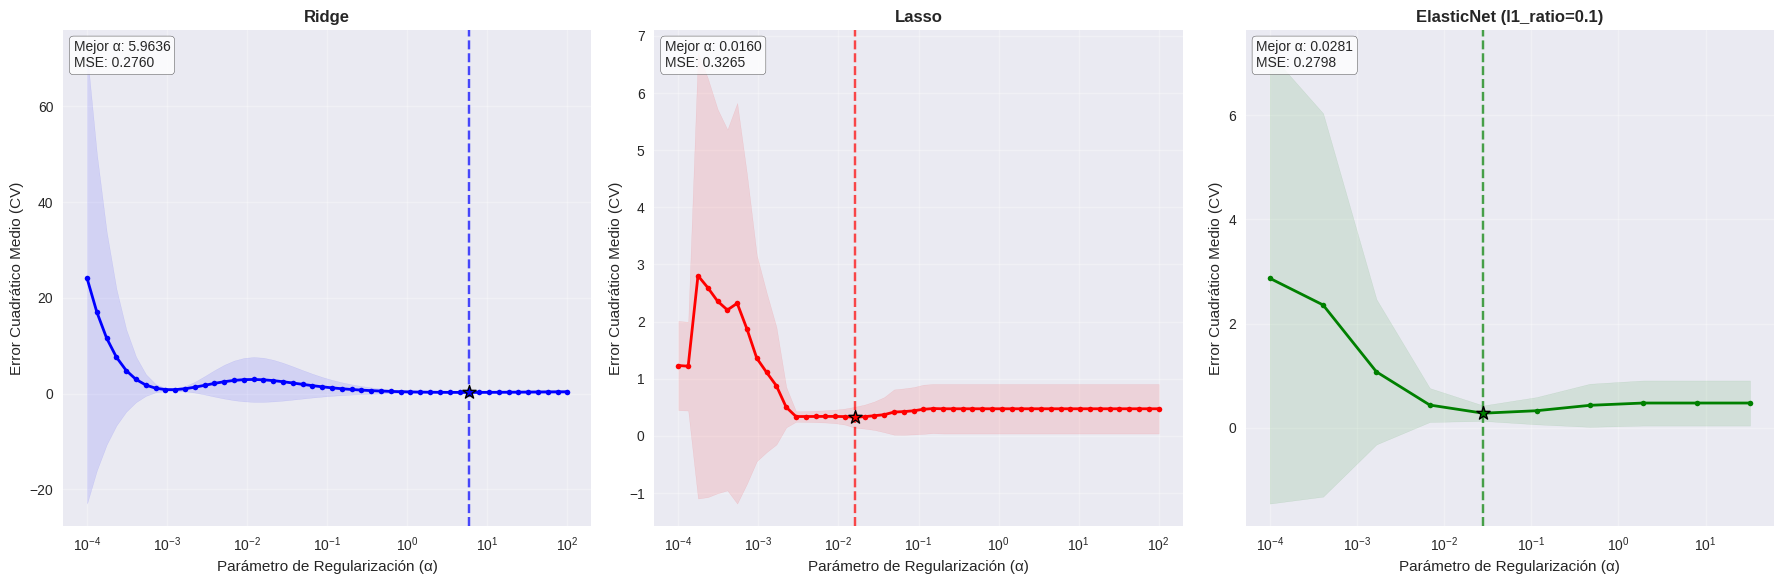


🏁 EVALUACIÓN FINAL DE MEJORES MODELOS
                       train_mse  test_mse  train_r2  test_r2
Ridge_Optimizado          0.1120    0.1098    0.6678   0.5926
Lasso_Optimizado          0.1094    0.1195    0.6755   0.5565
ElasticNet_Optimizado     0.1089    0.1102    0.6769   0.5911

🥇 MEJOR MODELO GENERAL: Ridge_Optimizado
   MSE en prueba: 0.109804
   R² en prueba: 0.592581


In [25]:
# Visualizar curvas de validación
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

methods = ['Ridge', 'Lasso', 'ElasticNet']
colors = ['blue', 'red', 'green']

for i, method in enumerate(methods):
    ax = axes[i]
    result = optimization_results[method]

    if method == 'ElasticNet':
        # Para Elastic Net, mostrar solo la mejor l1_ratio
        cv_results = result['cv_results']
        best_l1 = result['best_l1_ratio']

        # Filtrar resultados para la mejor l1_ratio
        mask = np.array(cv_results['param_elastic__l1_ratio']) == best_l1
        alphas_plot = np.array(cv_results['param_elastic__alpha'])[mask]
        scores = -np.array(cv_results['mean_test_score'])[mask]
        scores_std = np.array(cv_results['std_test_score'])[mask]

        # Ordenar por alpha
        sort_idx = np.argsort(alphas_plot)
        alphas_plot = alphas_plot[sort_idx]
        scores = scores[sort_idx]
        scores_std = scores_std[sort_idx]

        ax.set_title(f'{method} (l1_ratio={best_l1})', fontweight='bold')
    else:
        # Para Ridge y Lasso
        cv_results = result['cv_results']
        param_name = f'{method.lower()}__alpha'
        alphas_plot = cv_results[f'param_{param_name}']
        scores = -cv_results['mean_test_score']
        scores_std = cv_results['std_test_score']

        ax.set_title(f'{method}', fontweight='bold')

    # Plotear curva de validación
    ax.semilogx(alphas_plot, scores, 'o-', color=colors[i], linewidth=2, markersize=4)
    ax.fill_between(alphas_plot, scores - scores_std, scores + scores_std,
                   alpha=0.1, color=colors[i])

    # Marcar el mejor valor
    best_alpha = result['best_alpha']
    best_score = result['best_score']
    ax.axvline(x=best_alpha, color=colors[i], linestyle='--', alpha=0.7)
    ax.scatter(best_alpha, best_score, color=colors[i], s=100, zorder=5,
              marker='*', edgecolor='black', linewidth=1)

    ax.set_xlabel('Parámetro de Regularización (α)')
    ax.set_ylabel('Error Cuadrático Medio (CV)')
    ax.grid(True, alpha=0.3)

    # Agregar texto con mejor valor
    ax.text(0.02, 0.98, f'Mejor α: {best_alpha:.4f}\nMSE: {best_score:.4f}',
           transform=ax.transAxes, fontsize=10, verticalalignment='top',
           bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

plt.tight_layout()
plt.show()

# Comparar mejores modelos
print("\n🏁 EVALUACIÓN FINAL DE MEJORES MODELOS")
print("=" * 60)

best_models_eval = {}
for method, result in optimization_results.items():
    best_model = result['best_model']
    metrics = evaluar_modelo(best_model, X_train, y_train, X_test, y_test)
    best_models_eval[f'{method}_Optimizado'] = metrics

df_best = pd.DataFrame(best_models_eval).T
df_best = df_best.round(4)
print(df_best[['train_mse', 'test_mse', 'train_r2', 'test_r2']].to_string())

# Encontrar el mejor modelo general
best_overall = min(best_models_eval.items(), key=lambda x: x[1]['test_mse'])
print(f"\n🥇 MEJOR MODELO GENERAL: {best_overall[0]}")
print(f"   MSE en prueba: {best_overall[1]['test_mse']:.6f}")
print(f"   R² en prueba: {best_overall[1]['test_r2']:.6f}")

## 9. Casos Reales de Aplicación

### 🏥 Aplicación en Datos Médicos

Vamos a aplicar nuestros conocimientos a un dataset real del dominio médico:

In [26]:
# Cargar dataset de diabetes
from sklearn.datasets import load_diabetes

print("🏥 CASO DE ESTUDIO: PREDICCIÓN DE PROGRESIÓN DE DIABETES")
print("=" * 70)

# Cargar datos
diabetes = load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
feature_names = diabetes.feature_names

print(f"📊 Información del Dataset:")
print(f"   • Número de muestras: {X_diabetes.shape[0]}")
print(f"   • Número de características: {X_diabetes.shape[1]}")
print(f"   • Características: {', '.join(feature_names)}")
print(f"   • Variable objetivo: Progresión de diabetes (continua)")
print(f"   • Rango objetivo: [{y_diabetes.min():.1f}, {y_diabetes.max():.1f}]")

# Dividir datos
X_train_diab, X_test_diab, y_train_diab, y_test_diab = train_test_split(
    X_diabetes, y_diabetes, test_size=0.3, random_state=42
)

# Estandarizar características (importante para regularización)
scaler = StandardScaler()
X_train_diab_scaled = scaler.fit_transform(X_train_diab)
X_test_diab_scaled = scaler.transform(X_test_diab)

print(f"\n📈 División de datos:")
print(f"   • Entrenamiento: {X_train_diab.shape[0]} muestras")
print(f"   • Prueba: {X_test_diab.shape[0]} muestras")

# Crear DataFrame para análisis
df_diabetes = pd.DataFrame(X_diabetes, columns=feature_names)
df_diabetes['target'] = y_diabetes

# Análisis exploratorio básico
print(f"\n📊 Estadísticas descriptivas:")
print(df_diabetes.describe().round(2))

🏥 CASO DE ESTUDIO: PREDICCIÓN DE PROGRESIÓN DE DIABETES
📊 Información del Dataset:
   • Número de muestras: 442
   • Número de características: 10
   • Características: age, sex, bmi, bp, s1, s2, s3, s4, s5, s6
   • Variable objetivo: Progresión de diabetes (continua)
   • Rango objetivo: [25.0, 346.0]

📈 División de datos:
   • Entrenamiento: 309 muestras
   • Prueba: 133 muestras

📊 Estadísticas descriptivas:
          age     sex     bmi      bp      s1      s2      s3      s4      s5  \
count  442.00  442.00  442.00  442.00  442.00  442.00  442.00  442.00  442.00   
mean    -0.00    0.00   -0.00   -0.00   -0.00    0.00   -0.00   -0.00    0.00   
std      0.05    0.05    0.05    0.05    0.05    0.05    0.05    0.05    0.05   
min     -0.11   -0.04   -0.09   -0.11   -0.13   -0.12   -0.10   -0.08   -0.13   
25%     -0.04   -0.04   -0.03   -0.04   -0.03   -0.03   -0.04   -0.04   -0.03   
50%      0.01   -0.04   -0.01   -0.01   -0.00   -0.00   -0.01   -0.00   -0.00   
75%      0.04    0

In [27]:
# Aplicar diferentes técnicas de regularización al dataset médico
def evaluar_regularizacion_diabetes(X_train, y_train, X_test, y_test):
    """
    Evalúa diferentes técnicas de regularización en el dataset de diabetes.
    """
    models_diabetes = {}
    results_diabetes = {}

    # Rango de alphas optimizado para este dataset
    alphas = [0.1, 1.0, 10.0, 100.0, 1000.0]

    # Modelo base sin regularización
    lr = LinearRegression()
    lr.fit(X_train, y_train)
    models_diabetes['Linear_Regression'] = lr

    # Evaluar modelo base
    y_train_pred = lr.predict(X_train)
    y_test_pred = lr.predict(X_test)
    results_diabetes['Linear_Regression'] = {
        'train_mse': mean_squared_error(y_train, y_train_pred),
        'test_mse': mean_squared_error(y_test, y_test_pred),
        'train_r2': r2_score(y_train, y_train_pred),
        'test_r2': r2_score(y_test, y_test_pred),
        'n_features': X_train.shape[1],
        'n_nonzero_coef': X_train.shape[1]
    }

    # Probar diferentes valores de regularización
    for alpha in alphas:
        # Ridge
        ridge = Ridge(alpha=alpha, random_state=42)
        ridge.fit(X_train, y_train)
        models_diabetes[f'Ridge_α{alpha}'] = ridge

        y_train_pred = ridge.predict(X_train)
        y_test_pred = ridge.predict(X_test)
        results_diabetes[f'Ridge_α{alpha}'] = {
            'train_mse': mean_squared_error(y_train, y_train_pred),
            'test_mse': mean_squared_error(y_test, y_test_pred),
            'train_r2': r2_score(y_train, y_train_pred),
            'test_r2': r2_score(y_test, y_test_pred),
            'n_features': X_train.shape[1],
            'n_nonzero_coef': np.sum(np.abs(ridge.coef_) > 1e-6)
        }

        # Lasso
        lasso = Lasso(alpha=alpha, max_iter=2000, random_state=42)
        lasso.fit(X_train, y_train)
        models_diabetes[f'Lasso_α{alpha}'] = lasso

        y_train_pred = lasso.predict(X_train)
        y_test_pred = lasso.predict(X_test)
        results_diabetes[f'Lasso_α{alpha}'] = {
            'train_mse': mean_squared_error(y_train, y_train_pred),
            'test_mse': mean_squared_error(y_test, y_test_pred),
            'train_r2': r2_score(y_train, y_train_pred),
            'test_r2': r2_score(y_test, y_test_pred),
            'n_features': X_train.shape[1],
            'n_nonzero_coef': np.sum(np.abs(lasso.coef_) > 1e-6)
        }

    return models_diabetes, results_diabetes

# Evaluar modelos
print("🔄 Evaluando regularización en dataset médico...")
models_diab, results_diab = evaluar_regularizacion_diabetes(
    X_train_diab_scaled, y_train_diab, X_test_diab_scaled, y_test_diab
)

# Crear DataFrame con resultados
df_diab_results = pd.DataFrame(results_diab).T
df_diab_results = df_diab_results.round(4)

print("\n📊 RESULTADOS EN DATASET DE DIABETES")
print("=" * 80)
print(df_diab_results[['train_mse', 'test_mse', 'train_r2', 'test_r2', 'n_nonzero_coef']].to_string())

# Encontrar mejor modelo
best_diab_model = min(results_diab.items(), key=lambda x: x[1]['test_mse'])
print(f"\n🏆 MEJOR MODELO: {best_diab_model[0]}")
print(f"   MSE en prueba: {best_diab_model[1]['test_mse']:.4f}")
print(f"   R² en prueba: {best_diab_model[1]['test_r2']:.4f}")
print(f"   Características seleccionadas: {best_diab_model[1]['n_nonzero_coef']}/{best_diab_model[1]['n_features']}")

🔄 Evaluando regularización en dataset médico...

📊 RESULTADOS EN DATASET DE DIABETES
                   train_mse   test_mse  train_r2  test_r2  n_nonzero_coef
Linear_Regression  2924.0464  2821.7510    0.5244   0.4773            10.0
Ridge_α0.1         2924.0789  2821.4028    0.5244   0.4774            10.0
Lasso_α0.1         2927.1078  2817.0876    0.5239   0.4782             9.0
Ridge_α1.0         2925.9833  2819.9820    0.5241   0.4776            10.0
Lasso_α1.0         2956.3347  2784.3344    0.5192   0.4842             9.0
Ridge_α10.0        2943.1915  2817.4911    0.5213   0.4781            10.0
Lasso_α10.0        3315.3972  2924.8897    0.4608   0.4582             4.0
Ridge_α100.0       3038.0806  2819.3323    0.5059   0.4777            10.0
Lasso_α100.0       6148.2818  5432.8864    0.0000  -0.0064             0.0
Ridge_α1000.0      4082.0838  3557.5355    0.3361   0.3410            10.0
Lasso_α1000.0      6148.2818  5432.8864    0.0000  -0.0064             0.0

🏆 MEJOR MODELO

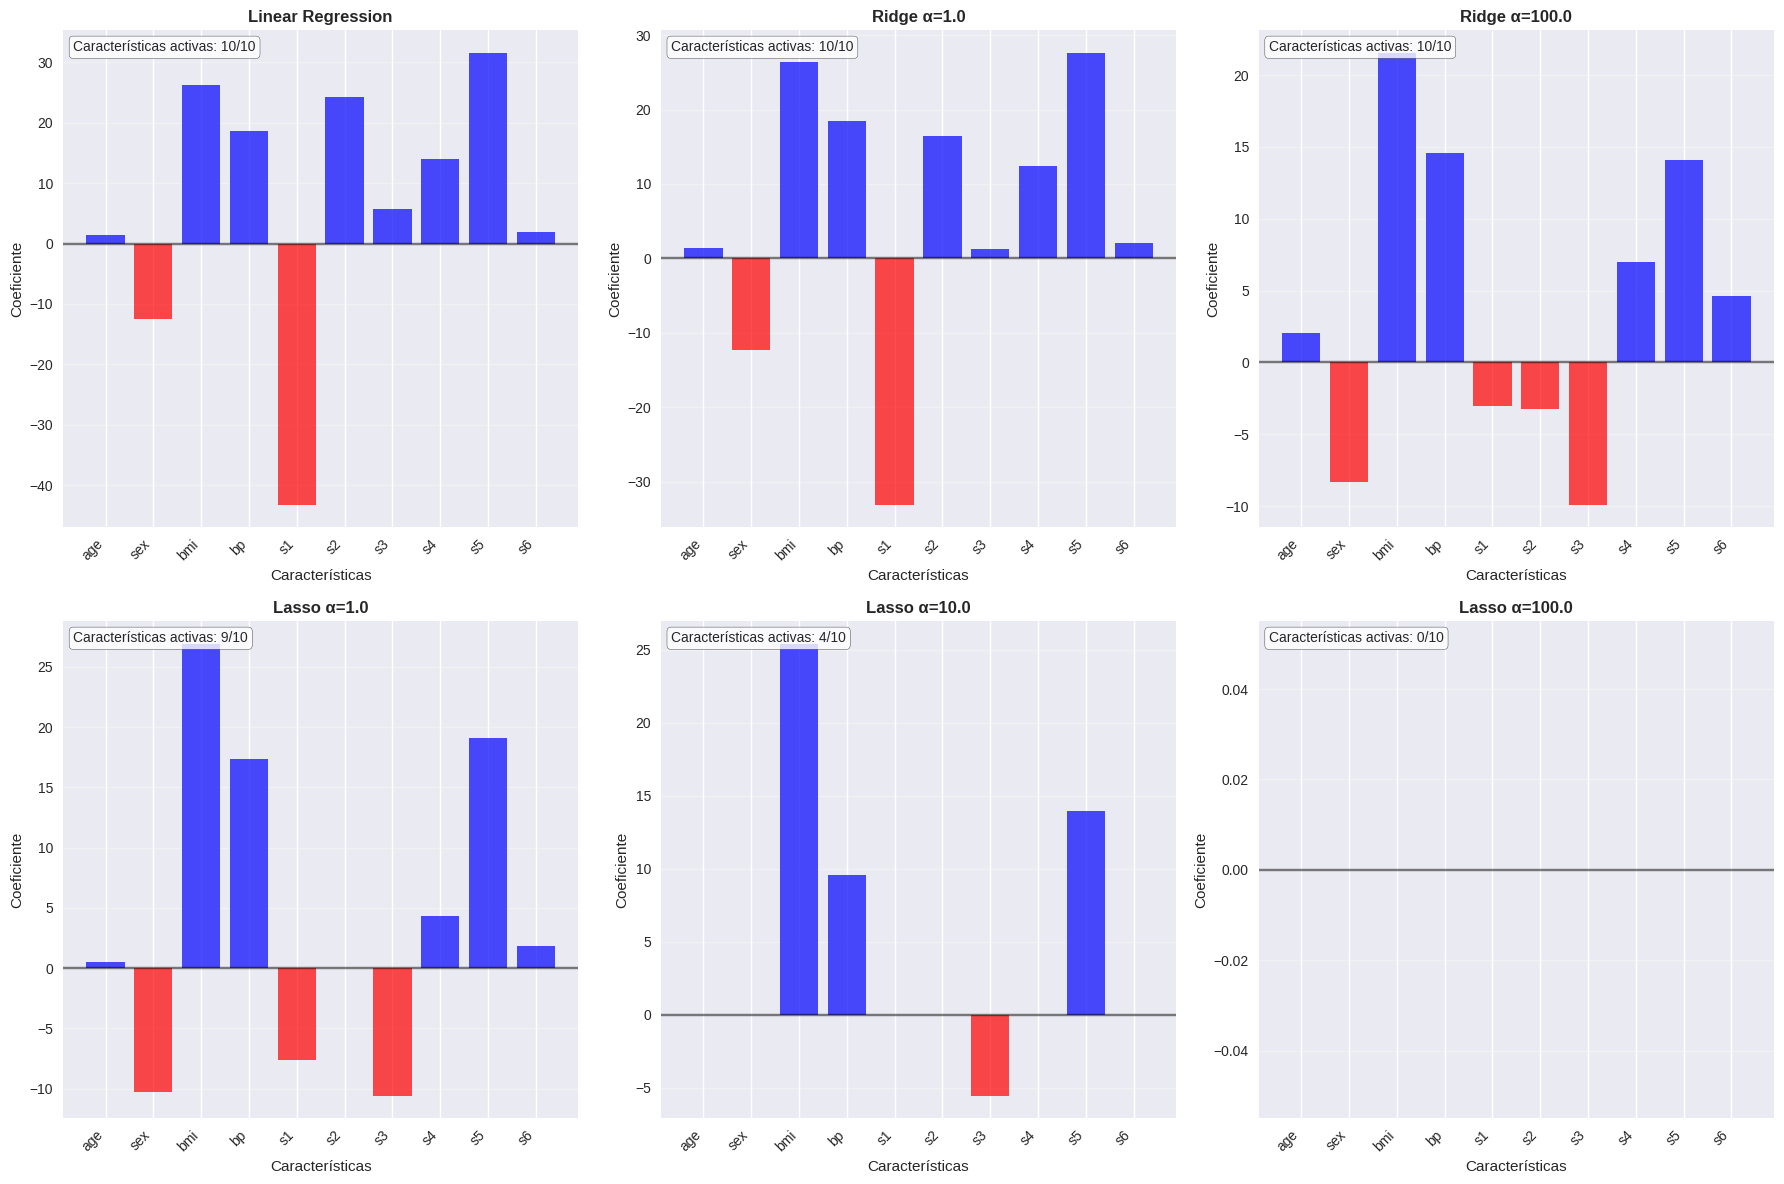


📋 COEFICIENTES POR MODELO Y CARACTERÍSTICA
     Linear Regression  Ridge α=1.0  Ridge α=100.0  Lasso α=1.0  Lasso α=10.0  Lasso α=100.0
age             1.3525       1.4466         2.0302       0.4829        0.0000            0.0
sex           -12.4543     -12.3461        -8.2851     -10.2366       -0.0000            0.0
bmi            26.2100      26.3633        21.5439      26.9006       25.4076            0.0
bp             18.6144      18.4672        14.5830      17.3402        9.5633            0.0
s1            -43.2604     -33.1003        -3.0120      -7.5925       -0.0000            0.0
s2             24.2556      16.3903        -3.2527      -0.0000       -0.0000            0.0
s3              5.7386       1.2829        -9.9022     -10.5901       -5.5506           -0.0
s4             13.9634      12.4822         7.0213       4.2870        0.0000            0.0
s5             31.5752      27.6076        14.1111      19.0823       13.9760            0.0
s6              1.9834    

In [28]:
# Análisis de importancia de características
def analizar_importancia_caracteristicas(models_dict, feature_names):
    """
    Analiza la importancia de características en diferentes modelos.
    """
    fig, axes = plt.subplots(2, 3, figsize=(18, 12))
    axes = axes.ravel()

    # Seleccionar modelos representativos
    selected_models = {
        'Linear Regression': models_dict['Linear_Regression'],
        'Ridge α=1.0': models_dict['Ridge_α1.0'],
        'Ridge α=100.0': models_dict['Ridge_α100.0'],
        'Lasso α=1.0': models_dict['Lasso_α1.0'],
        'Lasso α=10.0': models_dict['Lasso_α10.0'],
        'Lasso α=100.0': models_dict['Lasso_α100.0']
    }

    for i, (name, model) in enumerate(selected_models.items()):
        ax = axes[i]

        # Obtener coeficientes
        coefs = model.coef_

        # Crear gráfica de barras
        colors = ['red' if c < 0 else 'blue' for c in coefs]
        bars = ax.bar(range(len(coefs)), coefs, color=colors, alpha=0.7)

        # Configuración
        ax.set_title(name, fontweight='bold')
        ax.set_xlabel('Características')
        ax.set_ylabel('Coeficiente')
        ax.set_xticks(range(len(feature_names)))
        ax.set_xticklabels(feature_names, rotation=45, ha='right')
        ax.grid(True, alpha=0.3, axis='y')
        ax.axhline(y=0, color='black', linestyle='-', alpha=0.5)

        # Agregar información sobre características no cero
        n_nonzero = np.sum(np.abs(coefs) > 1e-6)
        ax.text(0.02, 0.98, f'Características activas: {n_nonzero}/{len(coefs)}',
               transform=ax.transAxes, fontsize=10, verticalalignment='top',
               bbox=dict(boxstyle='round', facecolor='white', alpha=0.8))

    plt.tight_layout()
    plt.show()

    # Tabla de coeficientes
    print("\n📋 COEFICIENTES POR MODELO Y CARACTERÍSTICA")
    print("=" * 80)

    coef_data = {}
    for name, model in selected_models.items():
        coef_data[name] = model.coef_

    df_coefs = pd.DataFrame(coef_data, index=feature_names)
    df_coefs = df_coefs.round(4)
    print(df_coefs.to_string())

    return df_coefs

# Realizar análisis
df_coefs_analysis = analizar_importancia_caracteristicas(models_diab, feature_names)

# Análisis de selección de características por Lasso
print("\n🎯 ANÁLISIS DE SELECCIÓN DE CARACTERÍSTICAS (LASSO)")
print("=" * 70)

lasso_models = {k: v for k, v in models_diab.items() if 'Lasso' in k}
for name, model in lasso_models.items():
    selected_features = np.where(np.abs(model.coef_) > 1e-6)[0]
    selected_names = [feature_names[i] for i in selected_features]

    print(f"\n{name}:")
    print(f"  • Características seleccionadas: {len(selected_features)}/{len(feature_names)}")
    print(f"  • Nombres: {', '.join(selected_names)}")

    if len(selected_features) > 0:
        coef_values = model.coef_[selected_features]
        for feat, coef in zip(selected_names, coef_values):
            print(f"    - {feat}: {coef:.4f}")

## 10. Mejores Prácticas y Conclusiones

### 📚 Resumen de Conceptos Clave

A lo largo de este notebook hemos explorado en profundidad los conceptos de overfitting, underfitting y regularización. Aquí resumimos los puntos más importantes:

In [29]:
# Crear un resumen visual de mejores prácticas
print("🎯 MEJORES PRÁCTICAS PARA EVITAR OVERFITTING Y UNDERFITTING")
print("=" * 80)
print()

best_practices = {
    "📊 Diagnóstico": [
        "Usar curvas de aprendizaje para identificar problemas",
        "Monitorear brecha entre entrenamiento y validación",
        "Evaluar en conjunto de datos independiente",
        "Usar validación cruzada para estimaciones robustas"
    ],
    "🛡️ Prevención de Overfitting": [
        "Aplicar regularización L1/L2 apropiada",
        "Usar early stopping durante entrenamiento",
        "Aumentar tamaño del conjunto de datos",
        "Reducir complejidad del modelo si es necesario",
        "Aplicar dropout en redes neuronales"
    ],
    "📈 Prevención de Underfitting": [
        "Aumentar complejidad del modelo",
        "Agregar más características relevantes",
        "Reducir regularización excesiva",
        "Entrenar por más épocas",
        "Mejorar calidad de los datos"
    ],
    "⚙️ Selección de Regularización": [
        "L1 (Lasso): Para selección de características",
        "L2 (Ridge): Para características correlacionadas",
        "Elastic Net: Combinación de L1 y L2",
        "Usar validación cruzada para optimizar λ",
        "Estandarizar características antes de regularizar"
    ]
}

for category, practices in best_practices.items():
    print(f"{category}:")
    for practice in practices:
        print(f"  • {practice}")
    print()

# Crear tabla de decisión
print("🤔 GUÍA DE DECISIÓN: ¿QUÉ TÉCNICA USAR?")
print("=" * 60)

decision_guide = {
    "Situación": [
        "Muchas características, pocas relevantes",
        "Características correlacionadas",
        "Modelo interpretable necesario",
        "Prevenir overfitting general",
        "Dataset pequeño",
        "Modelo muy complejo"
    ],
    "Técnica Recomendada": [
        "Lasso (L1)",
        "Ridge (L2)",
        "Lasso (L1)",
        "Ridge (L2) o Elastic Net",
        "Ridge (L2) con λ alto",
        "Regularización fuerte + Early stopping"
    ],
    "Razón": [
        "Selección automática de características",
        "Distribuye efecto entre características",
        "Elimina características irrelevantes",
        "Suaviza coeficientes sin eliminar",
        "Previene overfitting efectivamente",
        "Control múltiple de complejidad"
    ]
}

df_decision = pd.DataFrame(decision_guide)
print(df_decision.to_string(index=False))

print("\n\n🎓 CONCLUSIONES PRINCIPALES")
print("=" * 40)
print()
print("1. 🎯 El overfitting y underfitting son problemas fundamentales en ML")
print("   que afectan la capacidad de generalización de los modelos.")
print()
print("2. ⚖️ El bias-variance tradeoff es clave para entender estos problemas:")
print("   • Alto bias → Underfitting")
print("   • Alta variance → Overfitting")
print()
print("3. 🛡️ La regularización es una herramienta poderosa para combatir")
print("   el overfitting, con diferentes técnicas para diferentes situaciones.")
print()
print("4. 📈 Las curvas de aprendizaje son esenciales para diagnosticar")
print("   problemas de ajuste en los modelos.")
print()
print("5. 🎯 La selección correcta de hiperparámetros mediante validación")
print("   cruzada es crucial para el éxito de la regularización.")
print()
print("6. 🏥 Los casos reales demuestran la aplicabilidad práctica de estas")
print("   técnicas en dominios como medicina, finanzas y tecnología.")

🎯 MEJORES PRÁCTICAS PARA EVITAR OVERFITTING Y UNDERFITTING

📊 Diagnóstico:
  • Usar curvas de aprendizaje para identificar problemas
  • Monitorear brecha entre entrenamiento y validación
  • Evaluar en conjunto de datos independiente
  • Usar validación cruzada para estimaciones robustas

🛡️ Prevención de Overfitting:
  • Aplicar regularización L1/L2 apropiada
  • Usar early stopping durante entrenamiento
  • Aumentar tamaño del conjunto de datos
  • Reducir complejidad del modelo si es necesario
  • Aplicar dropout en redes neuronales

📈 Prevención de Underfitting:
  • Aumentar complejidad del modelo
  • Agregar más características relevantes
  • Reducir regularización excesiva
  • Entrenar por más épocas
  • Mejorar calidad de los datos

⚙️ Selección de Regularización:
  • L1 (Lasso): Para selección de características
  • L2 (Ridge): Para características correlacionadas
  • Elastic Net: Combinación de L1 y L2
  • Usar validación cruzada para optimizar λ
  • Estandarizar característi

### 🚀 Ejercicio Final: Aplicación Completa

Como ejercicio final, vamos a crear una función que automatice todo el proceso de diagnóstico y aplicación de regularización:

In [30]:
def pipeline_regularizacion_automatica(X, y, test_size=0.3, cv=5, verbose=True):
    """
    Pipeline automatizado para diagnóstico y aplicación de regularización.

    Parámetros:
    -----------
    X, y : arrays
        Datos de entrada
    test_size : float
        Proporción de datos para prueba
    cv : int
        Folds para validación cruzada
    verbose : bool
        Mostrar información detallada

    Retorna:
    --------
    dict : Resultados completos del análisis
    """
    if verbose:
        print("🤖 PIPELINE AUTOMATIZADO DE REGULARIZACIÓN")
        print("=" * 50)

    # 1. Dividir datos
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, test_size=test_size, random_state=42
    )

    # 2. Estandarizar si es necesario
    if X.shape[1] > 1:  # Solo para datasets multivariados
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
    else:
        X_train_scaled = X_train
        X_test_scaled = X_test
        scaler = None

    if verbose:
        print(f"📊 Datos divididos: {len(X_train)} entrenamiento, {len(X_test)} prueba")

    # 3. Modelo base (sin regularización)
    lr_base = LinearRegression()
    lr_base.fit(X_train_scaled, y_train)

    y_train_pred_base = lr_base.predict(X_train_scaled)
    y_test_pred_base = lr_base.predict(X_test_scaled)

    mse_train_base = mean_squared_error(y_train, y_train_pred_base)
    mse_test_base = mean_squared_error(y_test, y_test_pred_base)

    # 4. Diagnóstico inicial
    gap_base = mse_test_base - mse_train_base

    if gap_base > 0.1 * mse_train_base:  # Brecha > 10% del error de entrenamiento
        diagnosis = "OVERFITTING"
        recommendation = "Aplicar regularización"
    elif mse_test_base > np.var(y_test):  # Error mayor que varianza
        diagnosis = "UNDERFITTING"
        recommendation = "Aumentar complejidad o reducir regularización"
    else:
        diagnosis = "APROPIADO"
        recommendation = "Modelo balanceado"

    if verbose:
        print(f"\n🔍 Diagnóstico inicial: {diagnosis}")
        print(f"   MSE entrenamiento: {mse_train_base:.4f}")
        print(f"   MSE prueba: {mse_test_base:.4f}")
        print(f"   Brecha: {gap_base:.4f}")
        print(f"   Recomendación: {recommendation}")

    # 5. Optimización de regularización (si es necesario)
    if diagnosis == "OVERFITTING":
        if verbose:
            print("\n🛡️ Aplicando regularización...")

        # Rango de alphas
        alphas = np.logspace(-4, 2, 20)

        # Ridge
        ridge_scores = []
        for alpha in alphas:
            ridge = Ridge(alpha=alpha, random_state=42)
            scores = cross_val_score(ridge, X_train_scaled, y_train,
                                   cv=cv, scoring='neg_mean_squared_error')
            ridge_scores.append(-scores.mean())

        best_ridge_alpha = alphas[np.argmin(ridge_scores)]

        # Lasso
        lasso_scores = []
        for alpha in alphas:
            lasso = Lasso(alpha=alpha, max_iter=2000, random_state=42)
            scores = cross_val_score(lasso, X_train_scaled, y_train,
                                   cv=cv, scoring='neg_mean_squared_error')
            lasso_scores.append(-scores.mean())

        best_lasso_alpha = alphas[np.argmin(lasso_scores)]

        # Entrenar mejores modelos
        best_ridge = Ridge(alpha=best_ridge_alpha, random_state=42)
        best_ridge.fit(X_train_scaled, y_train)

        best_lasso = Lasso(alpha=best_lasso_alpha, max_iter=2000, random_state=42)
        best_lasso.fit(X_train_scaled, y_train)

        # Evaluar
        ridge_test_mse = mean_squared_error(y_test, best_ridge.predict(X_test_scaled))
        lasso_test_mse = mean_squared_error(y_test, best_lasso.predict(X_test_scaled))

        if ridge_test_mse < lasso_test_mse:
            best_model = best_ridge
            best_method = "Ridge"
            best_alpha = best_ridge_alpha
            best_mse = ridge_test_mse
        else:
            best_model = best_lasso
            best_method = "Lasso"
            best_alpha = best_lasso_alpha
            best_mse = lasso_test_mse

        improvement = ((mse_test_base - best_mse) / mse_test_base) * 100

        if verbose:
            print(f"   🏆 Mejor método: {best_method}")
            print(f"   🎯 Mejor α: {best_alpha:.6f}")
            print(f"   📈 MSE final: {best_mse:.4f}")
            print(f"   ✨ Mejora: {improvement:.2f}%")

    else:
        best_model = lr_base
        best_method = "Linear Regression"
        best_alpha = 0.0
        best_mse = mse_test_base
        improvement = 0.0

    # 6. Resultados finales
    results = {
        'diagnosis': diagnosis,
        'recommendation': recommendation,
        'base_model': {
            'train_mse': mse_train_base,
            'test_mse': mse_test_base,
            'gap': gap_base
        },
        'best_model': best_model,
        'best_method': best_method,
        'best_alpha': best_alpha,
        'best_mse': best_mse,
        'improvement_percent': improvement,
        'scaler': scaler,
        'X_train': X_train_scaled,
        'X_test': X_test_scaled,
        'y_train': y_train,
        'y_test': y_test
    }

    return results

# Probar el pipeline con nuestros datos sintéticos
print("🧪 PROBANDO PIPELINE AUTOMATIZADO")
print("=" * 50)

# Crear datos con overfitting (polinomio de grado alto)
X_poly = PolynomialFeatures(degree=15, include_bias=False).fit_transform(X)

results_auto = pipeline_regularizacion_automatica(X_poly, y, verbose=True)

print("\n✅ Pipeline completado exitosamente")
print(f"\n📋 RESUMEN FINAL:")
print(f"   • Diagnóstico: {results_auto['diagnosis']}")
print(f"   • Mejor método: {results_auto['best_method']}")
print(f"   • Mejora obtenida: {results_auto['improvement_percent']:.2f}%")

🧪 PROBANDO PIPELINE AUTOMATIZADO
🤖 PIPELINE AUTOMATIZADO DE REGULARIZACIÓN
📊 Datos divididos: 70 entrenamiento, 30 prueba

🔍 Diagnóstico inicial: OVERFITTING
   MSE entrenamiento: 0.0072
   MSE prueba: 0.0088
   Brecha: 0.0016
   Recomendación: Aplicar regularización

🛡️ Aplicando regularización...
   🏆 Mejor método: Ridge
   🎯 Mejor α: 0.000100
   📈 MSE final: 0.0257
   ✨ Mejora: -190.74%

✅ Pipeline completado exitosamente

📋 RESUMEN FINAL:
   • Diagnóstico: OVERFITTING
   • Mejor método: Ridge
   • Mejora obtenida: -190.74%


### 📚 Referencias y Recursos Adicionales

**Libros Recomendados:**
1. *The Elements of Statistical Learning* - Hastie, Tibshirani & Friedman
2. *Pattern Recognition and Machine Learning* - Christopher Bishop
3. *Hands-On Machine Learning* - Aurélien Géron

**Recursos Online:**
1. [Scikit-learn Documentation](https://scikit-learn.org/stable/)
2. [Andrew Ng's Machine Learning Course](https://www.coursera.org/learn/machine-learning)
3. [Bias-Variance Tradeoff Explained](https://scott.fortmann-roe.com/docs/BiasVariance.html)

**Papers Fundamentales:**
1. Tibshirani, R. (1996). Regression shrinkage and selection via the lasso.
2. Hoerl, A. E., & Kennard, R. W. (1970). Ridge regression: Biased estimation for nonorthogonal problems.
3. Zou, H., & Hastie, T. (2005). Regularization and variable selection via the elastic net.

---

### 🎉 ¡Felicitaciones!

Has completado una exploración exhaustiva de los conceptos de overfitting, underfitting y regularización. Ahora tienes las herramientas teóricas y prácticas para:

✅ **Diagnosticar** problemas de ajuste en tus modelos  
✅ **Aplicar** técnicas de regularización apropiadas  
✅ **Optimizar** hiperparámetros efectivamente  
✅ **Interpretar** resultados y tomar decisiones informadas  
✅ **Implementar** soluciones en casos reales  

**¡Continúa practicando y aplicando estos conceptos en tus propios proyectos!** 🚀